# A Demo and Comparison of Categorical Methods (Pt. 2)

**Please refer to [part 1](https://github.com/FeatureLabs/categorical-encoding/blob/master/notebooks/categorical-encoding-demo.ipynb) first for a more comprehensive explanation.**

Similar to part 1, we will be following [this categorical encoding guide](https://github.com/FeatureLabs/categorical-encoding/blob/master/notebooks/categorical-encoding-guide.ipynb) and comparing different categorical encoding methods on a dataset.

For this notebook, we will be using [this Kaggle dataset on predicting restaurant visitors](https://www.kaggle.com/c/recruit-restaurant-visitor-forecasting/data) for analyzing different categorical encoding approaches. In this repo, we will aim to predict the number of visitors a restaurant will receive on a given date based on information from the reservation websites, the date/location, and details about the restaurant itself.

In [1]:
import featuretools as ft
import utils2
ft.__version__

'0.9.1'

## Load EntitySet

The data is structured in such a way that there are two distinct websites for reservations that are used. Thus, the data is initially stored in separate datasets. For a more detailed explanation behind the data preparation, check out the [utils2.py] file.

In [2]:
es = utils2.load_entityset('./data/')
es

/Users/alex/workspace/categorical-encoding/guides/notebooks/utils2.py:84: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  combined_reserve = (pd.concat([air_reserve, hpg_reserve], ignore_index=True)


Entityset: customer_data
  Entities:
    store_info [Rows: 14004, Columns: 6]
    visit_data [Rows: 252108, Columns: 6]
    reservations [Rows: 2092698, Columns: 10]
    date_info [Rows: 517, Columns: 2]
    genres [Rows: 45, Columns: 1]
  Relationships:
    store_info.genre_name -> genres.genre_name
    visit_data.store_id -> store_info.store_id
    reservations.store_calendar_id -> visit_data.store_calendar_id

## Visualize Data

The entity `date_info` is not connected to the entityset, but we include it for visualization purposes/to understand the data better.

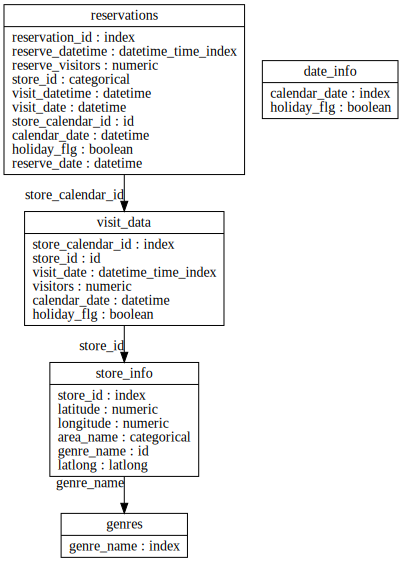

In [3]:
es.plot()

## Automated Feature Engineering

We apply Featuretools' Deep Feature Synthesis in order to generate our features.

In [4]:
feature_matrix, feature_defs = ft.dfs(entityset=es,
                                      target_entity="visit_data",
                                      verbose=True,
                                      drop_contains=['visit_data.visitors'])
feature_defs[:10]

Built 77 features
Elapsed: 04:56 | Progress: 100%|██████████


[<Feature: store_id>,
 <Feature: visitors>,
 <Feature: holiday_flg>,
 <Feature: SUM(reservations.reserve_visitors)>,
 <Feature: STD(reservations.reserve_visitors)>,
 <Feature: MAX(reservations.reserve_visitors)>,
 <Feature: SKEW(reservations.reserve_visitors)>,
 <Feature: MIN(reservations.reserve_visitors)>,
 <Feature: MEAN(reservations.reserve_visitors)>,
 <Feature: COUNT(reservations)>]

In [ ]:
es['store_info'].df['area_name'].describe()

count                          5456
unique                          214
top       Tōkyō-to Shinjuku-ku None
freq                            255
Name: area_name, dtype: object

This column is a high cardinality feature because it has 214 unique categorical values, higher than the limit of 15 we set in [our guide](https://github.com/FeatureLabs/categorical-encoding/blob/master/notebooks/categorical-encoding-guide.ipynb).

This means that for certain categorical encoding methods such as one-hot encoding, we may face issues due to our resulting matrix's high dimensionality.

In [ ]:
bayesian_results = utils2.bayesian_encoder_results(feature_matrix)

/Users/alex/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/alex/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/alex/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/alex/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/alex/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is 

In [ ]:
bayesian_results

,Encoder,Score,# Columns,Average Elapsed Time
0,TargetEncoder,SCORE: 0.60 +/- 0.00,76,2051.280419
1,LeaveOneOutEncoder,SCORE: 0.60 +/- 0.01,76,222.274679
2,JamesSteinEncoder,SCORE: 0.60 +/- 0.01,76,250.888776
3,MEstimateEncoder,SCORE: 0.60 +/- 0.00,76,203.386376


In [ ]:
classic_results = utils2.classic_encoder_results(feature_matrix)

/Users/alex/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/alex/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/alex/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/alex/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [ ]:
classic_results